In [1]:
# En caso de ejecutar en Google Colab, clonar el repositorio:
#!git clone https://github.com/fco-parga/mna_proyecto_integrador_eq09.git

In [2]:
# En caso de ejecutar en Google Colab, instalar requierimientos:
#!pip install -r mna_proyecto_integrador_eq09/requirements.txt -q

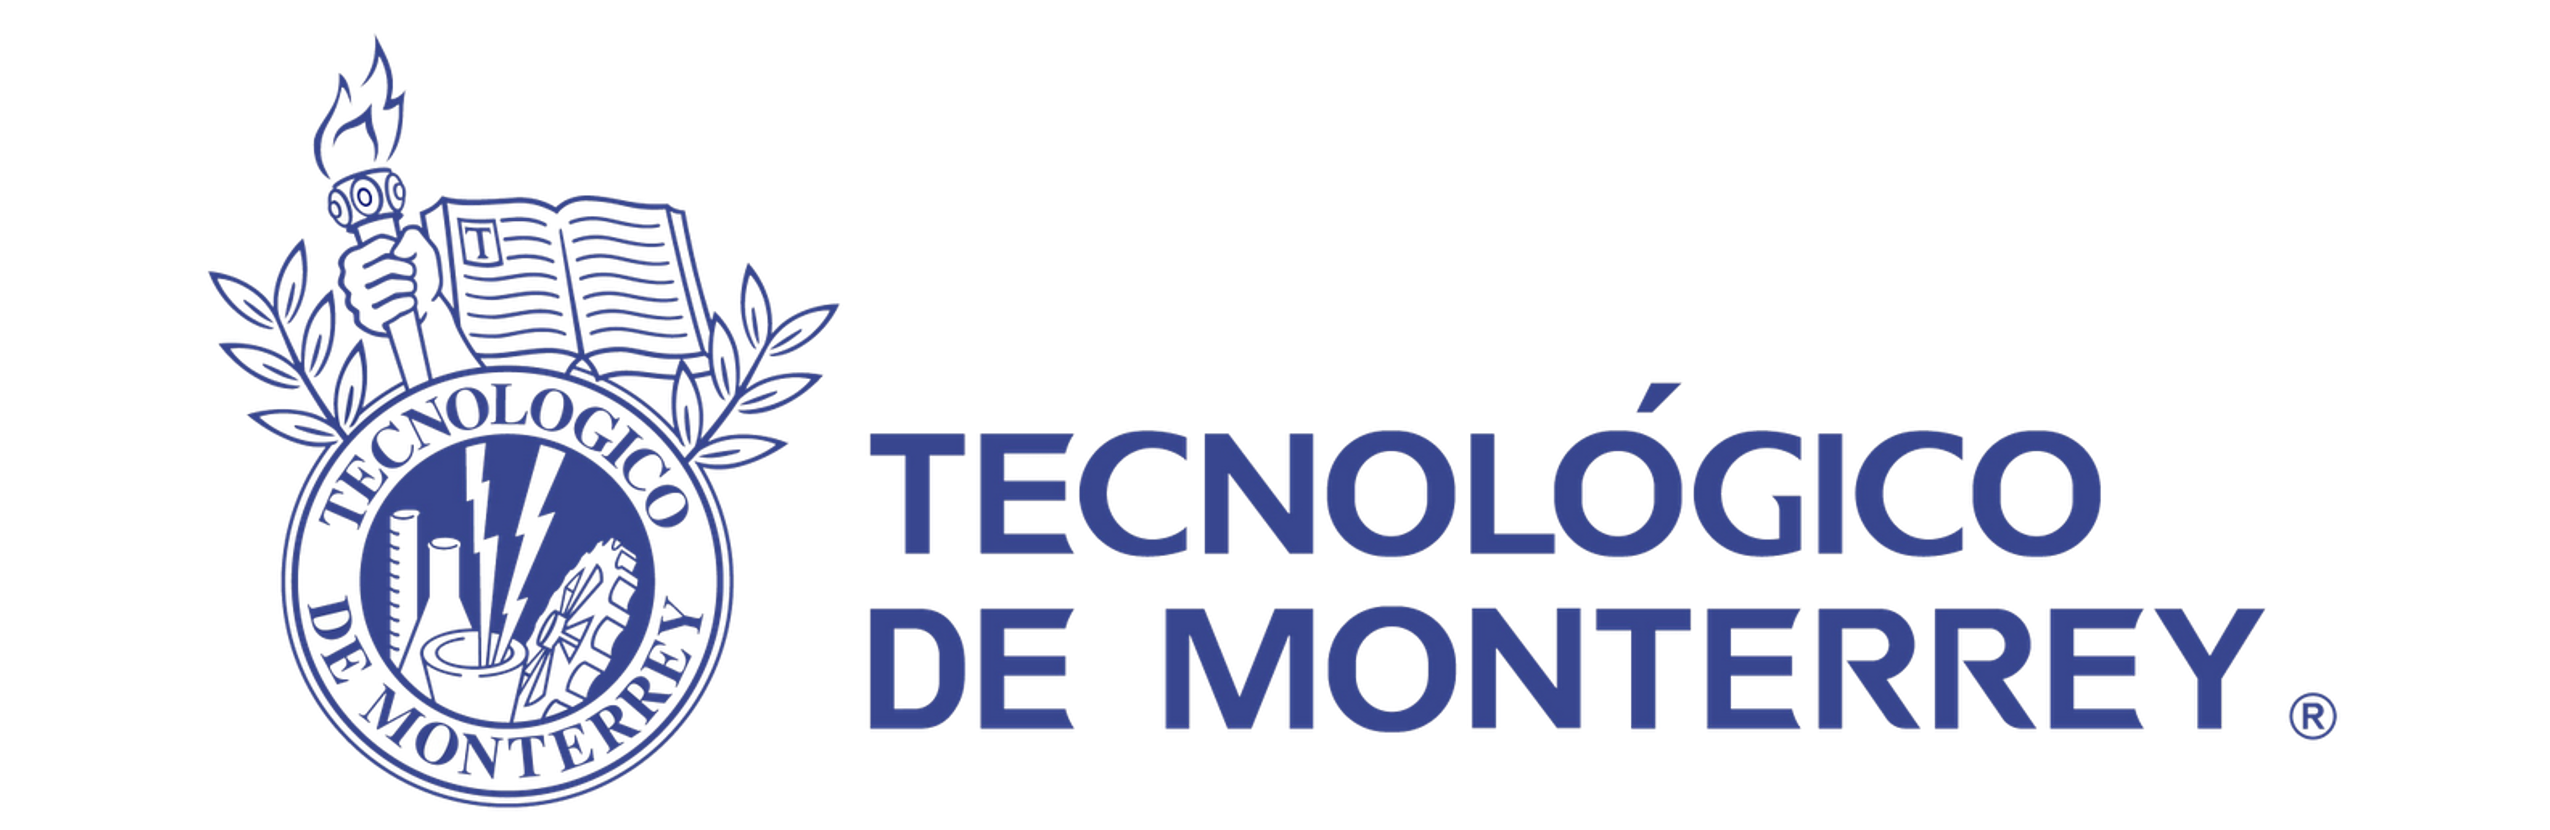

## TC5035 Proyecto integrador
### Tecnológico de Monterrey
#### Dra. Grettel Barceló Alonso
#### Dr. Luis Eduardo Falcón Morales

___


## Equipo 09

### Segmentación de audiencias y detección de respuesta emocional para anuncios digitales exteriores

Integrantes

> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338
> - Francisco Javier Parga García A01794380

# Avance 4
## Modelos alternativos

- Objetivos

    3.3 Explorar una gama diversa de técnicas y enfoques con el fin de identificar el de mejor desempeño en el conjunto de datos en cuestión.

    3.4 Encontrar la configuración óptima que maximiza el rendimiento del modelo en una tarea específica.

# Reposiotorio
https://github.com/fco-parga/mna_proyecto_integrador_eq09/

>- EDA: https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance1.09.pdf
>- Ingenieria de caracteristicas https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance2.09.pdf
>- Baseline https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/Avances/Avance3.09.pdf
>- 

# Folder de librerias

In [3]:
import os
import sys
import time
from pathlib import Path

def add_to_sys_path(project_folder):
    # Get the current working directory
    current_working_dir = os.getcwd()
    
    # Construct the path to the project directory
    project_path = os.path.join(current_working_dir.split(project_folder)[0], project_folder)
    
    # Add the project path to sys.path if it's not already there
    if project_path not in sys.path:
        sys.path.append(project_path)
        print(f"Added {project_path} to sys.path")
    else:
        print(f"{project_path} is already in sys.path")

    os.chdir(project_path)

In [4]:
project_folder_name = "mna_proyecto_integrador_eq09"
add_to_sys_path(project_folder_name)

Added C:\Users\fcopa\OneDrive\Python\mna\mna_proyecto_integrador_eq09 to sys.path


In [5]:
from librerias_integrador.utils import verificar_ambiente

In [6]:
envsys = verificar_ambiente()

Estás trabajando en un sistema Windows.


# Carga de datos

Para aumentar nuestra muestra de datos, tomamos fotos históricas del sistema de vigilancia de la cafetería. Con el objetivo de poder contar con más datos y robustecer el análisis para el modelo de inteligencia artificial.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)

In [8]:
from librerias_integrador.utils import cargar_y_preparar_dataframe

In [9]:
data_path = 'data/'

In [10]:
# Archivo con conteos iniciales
raw_csv = 'raw/hitorical_30min.csv'
raw_data_file = os.path.join(data_path, raw_csv)
raw_df = cargar_y_preparar_dataframe(raw_data_file)

raw_df.head(5)

country_code country_name city_code  \
event_timestamp                                                        
2023-04-25 19:24:21.511896-06:00           MX       Mexico    MX-CMX   
2023-04-25 19:54:59.165048-06:00           MX       Mexico    MX-CMX   
2023-04-25 20:25:05.386453-06:00           MX       Mexico    MX-CMX   
2023-04-25 20:56:02.770007-06:00           MX       Mexico    MX-CMX   
2023-04-25 21:26:39.954640-06:00           MX       Mexico    MX-CMX   

                                    city_name  zip_code       lat       lon  \
event_timestamp                                                               
2023-04-25 19:24:21.511896-06:00  Mexico City    9460.0  19.36487 -99.13421   
2023-04-25 19:54:59.165048-06:00  Mexico City    9460.0  19.36487 -99.13421   
2023-04-25 20:25:05.386453-06:00  Mexico City    9460.0  19.36487 -99.13421   
2023-04-25 20:56:02.770007-06:00  Mexico City    9460.0  19.36487 -99.13421   
2023-04-25 21:26:39.954640-06:00  Mexico City    9460.0  19.36487 -99.13421   

                                  cam_id         cam_name  \
event_timestamp                                             
2023-04-25 19:24:21.511896-06:00     1.0  cafe calaverita   
2023-04-25 19:54:59.165048-06:00     1.0  cafe calaverita   
2023-04-25 20:25:05.386453-06:00     1.0  cafe calaverita   
2023-04-25 20:56:02.770007-06:00     1.0  cafe calaverita   
2023-04-25 21:26:39.954640-06:00     1.0  cafe calaverita   

                                  cam_additional_location_description  add_id  \
event_timestamp                                                                 
2023-04-25 19:24:21.511896-06:00                                  NaN     NaN   
2023-04-25 19:54:59.165048-06:00                                  NaN     NaN   
2023-04-25 20:25:05.386453-06:00                                  NaN     NaN   
2023-04-25 20:56:02.770007-06:00                                  NaN     NaN   
2023-04-25 21:26:39.954640-06:00                                  NaN     NaN   

                                  add_name  add_type  people  views  females  \
event_timestamp                                                                
2023-04-25 19:24:21.511896-06:00       NaN       NaN       2    NaN      NaN   
2023-04-25 19:54:59.165048-06:00       NaN       NaN       6    NaN      NaN   
2023-04-25 20:25:05.386453-06:00       NaN       NaN       3    NaN      NaN   
2023-04-25 20:56:02.770007-06:00       NaN       NaN       2    NaN      NaN   
2023-04-25 21:26:39.954640-06:00       NaN       NaN       3    NaN      NaN   

                                  males  mode_age  median_age  \
event_timestamp                                                 
2023-04-25 19:24:21.511896-06:00    NaN       NaN         NaN   
2023-04-25 19:54:59.165048-06:00    NaN       NaN         NaN   
2023-04-25 20:25:05.386453-06:00    NaN       NaN         NaN   
2023-04-25 20:56:02.770007-06:00    NaN       NaN         NaN   
2023-04-25 21:26:39.954640-06:00    NaN       NaN         NaN   

                                  negative_emotion  positive_emotion  \
event_timestamp                                                        
2023-04-25 19:24:21.511896-06:00               NaN               NaN   
2023-04-25 19:54:59.165048-06:00               NaN               NaN   
2023-04-25 20:25:05.386453-06:00               NaN               NaN   
2023-04-25 20:56:02.770007-06:00               NaN               NaN   
2023-04-25 21:26:39.954640-06:00               NaN               NaN   

                                  average_emotion_score  cars  weather  \
event_timestamp                                                          
2023-04-25 19:24:21.511896-06:00                    NaN   NaN      NaN   
2023-04-25 19:54:59.165048-06:00                    NaN   NaN      NaN   
2023-04-25 20:25:05.386453-06:00                    NaN   NaN      NaN   
2023-04-25 20:56:02.770007-06:00                    NaN   NaN      NaN   
2023-04-25 2

## Distribución de conteo

In [11]:
from librerias_integrador.ploteo import plot_df_counts_histogram, plot_df_counts_timeseries

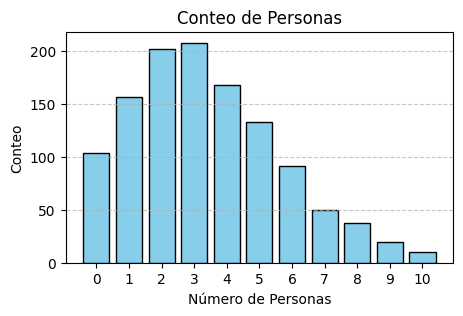

In [12]:
plot_df_counts_histogram(raw_df)

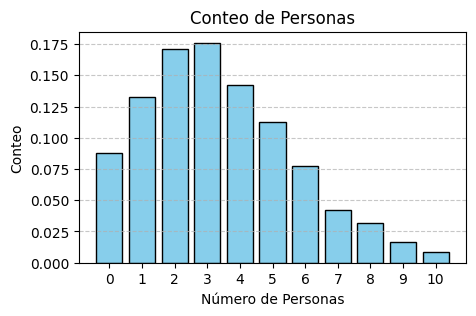

In [13]:
plot_df_counts_histogram(raw_df, normalize=True)

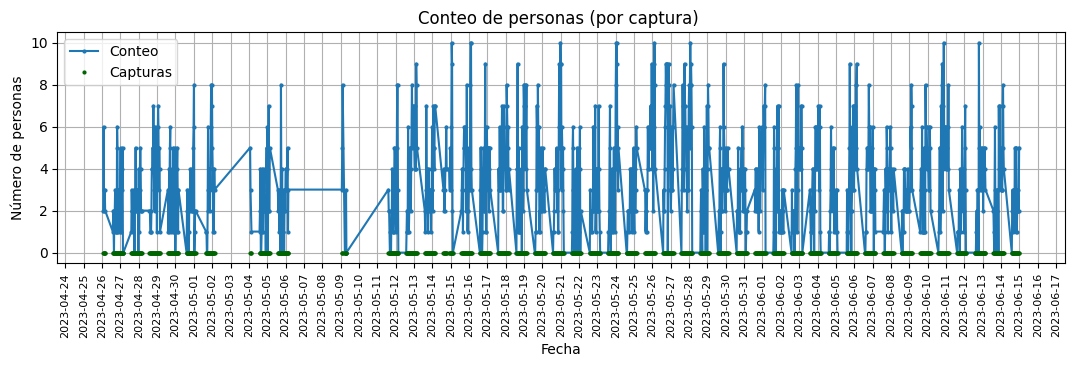

In [14]:
plot_df_counts_timeseries(raw_df, angle=90)

# Agragaciones temporales

In [15]:
grupos_dic = {}
agrupaciones = ['D']

for intervalo in agrupaciones:

    grupos_dic[intervalo] = raw_df.resample(intervalo).agg(
        mean=('people', 'mean'),
        sum=('people', 'sum')
    )

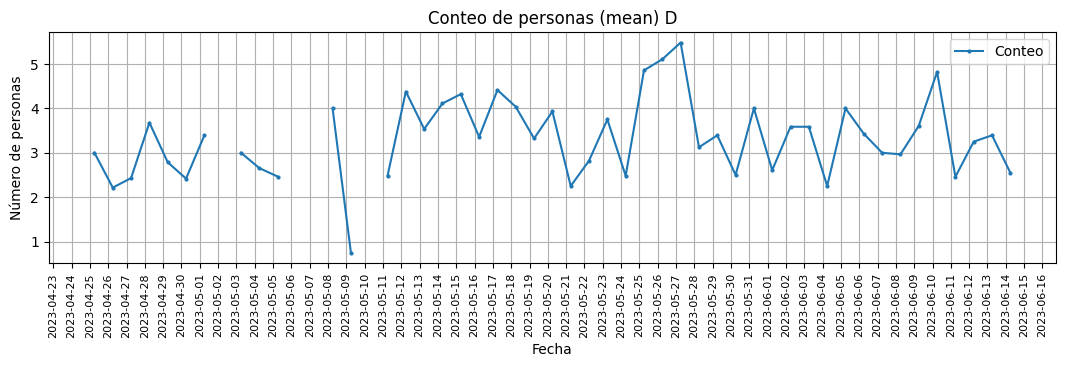

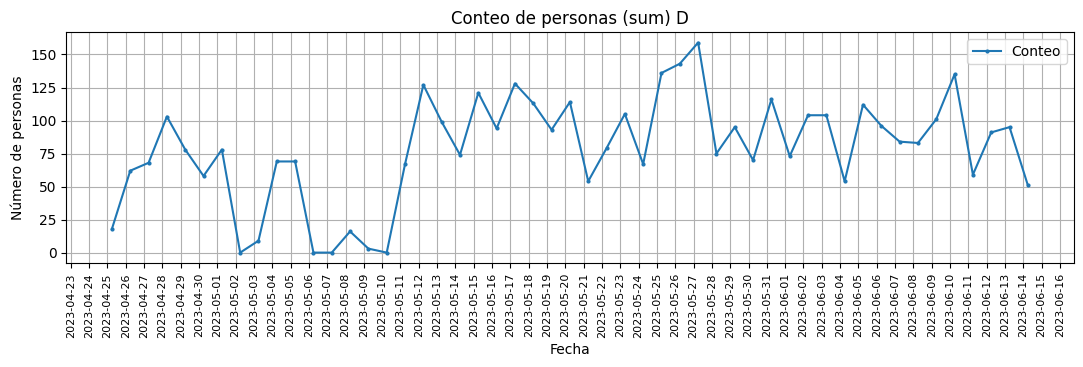

In [16]:
for intervalo in agrupaciones:
    for agg in ['mean','sum']:
        plot_df_counts_timeseries(grupos_dic[intervalo], grouped=True, agg2plot=agg, intervalo=intervalo,angle=90)

La serie de tiempos presentada en el gráfico muestra una variabilidad significativa en el conteo de personas por día, con picos y caídas notables que indican fluctuaciones en la cantidad de personas capturadas. 

El rango de datos va del 25 de abril de 2023 hasta el 14 de junio de 2023, y el número de personas varía de 0 a 150. 

Este comportamiento sugiere que puede haber factores externos o eventos que afectan la presencia de personas en las capturas, resultando en una serie de tiempo con alta variabilidad.

In [17]:
conteo_por_dia = pd.DataFrame(grupos_dic['D']['sum'].value_counts()).reset_index()

# Definimos los rangos
bins = [0, 50, 100, 150, 200, 250, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 'Mayor a 250']

# Creamos una nueva columna 'range' que indica el rango al que pertenece cada 'sum'
conteo_por_dia['range'] = pd.cut(conteo_por_dia['sum'], bins=bins, labels=labels, right=False)

# Agrupamos por la nueva columna 'range' y sumamos los 'count'
conteo_diario_por_rango = conteo_por_dia.groupby('range', observed=False)['count'].sum().reset_index()

conteo_diario_por_rango

range  count
0         0-50      8
1       51-100     27
2      101-150     15
3      151-200      1
4      201-250      0
5  Mayor a 250      0

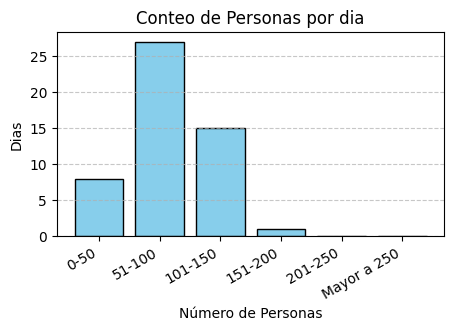

In [18]:
# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(conteo_diario_por_rango['range'], conteo_diario_por_rango['count'], color='skyblue', edgecolor='black', align='center')

# Añadir títulos y etiquetas
plt.title('Conteo de Personas por dia')
plt.xlabel('Número de Personas')
plt.ylabel('Dias')
plt.xticks(range(len(conteo_diario_por_rango)))  # Asegura que el eje x tenga marcas de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

# Ingenieria de caracteristicas

La ingeniería de características en series de tiempo es un paso crucial en el análisis y modelado de datos temporales. Se centra en la transformación de datos crudos en formatos que revelen más información y sean más adecuados para algoritmos de aprendizaje automático. Renault et al.(2023) destacan la importancia de la ingeniería de características automática para la clasificación de series de tiempo, demostrando que los métodos basados en características pueden ser tan precisos como los algoritmos de vanguardia. Además, el uso de la Transformada Rápida de Fourier (FFT) como herramienta de ingeniería de características ha demostrado mejorar la precisión y eficiencia de los modelos de pronóstico de series de tiempo.

*Referencias*
> - Galán-Sales, F.J., Reina-Jiménez , P., Carranza-García, M., Luna-Romera, J.M. (2023). An Approach to Enhance Time Series Forecasting by Fast Fourier Transform. In: García Bringas, P., et al. 18th International Conference on Soft Computing Models in Industrial and Environmental Applications (SOCO 2023). SOCO 2023. Lecture Notes in Networks and Systems, vol 749. Springer, Cham. https://doi.org/10.1007/978-3-031-42529-5_25 

> - Renault, A., Bondu, A., Lemaire, V., & Gay, D. (2023, June). Automatic Feature Engineering for Time Series Classification: Evaluation and Discussion. In 2023 International Joint Conference on Neural Networks (IJCNN) (pp. 1-10). IEEE. https://doi.org/10.1109/IJCNN54540.2023.10191074 


In [19]:
from sklearn.linear_model import LinearRegression

from librerias_integrador.features.datetime_feat import create_date_time_features

En este conjunto de datos hemos creado una característica de tendencia utilizando un modelo de regresión lineal, lo que permite capturar la dirección y velocidad del cambio en tus datos a lo largo del tiempo. 

In [20]:
grupos_dic['D']['timestamp'] = pd.to_datetime(grupos_dic['D'].index)
grupos_dic['D']['trend'] = np.arange(len(grupos_dic['D']))

# Ajustar un modelo de regresión lineal para la tendencia
X = grupos_dic['D'][['trend']]  # Característica de tendencia
y = grupos_dic['D']['sum']  # Variable objetivo
model = LinearRegression()
model.fit(X, y)

# Crear características de tendencia
grupos_dic['D']['trend_feature'] = model.predict(X)

Además, hemos extraído características temporales como el año, mes, día y día de la semana, así como un indicador binario para los fines de semana. Estas características pueden ayudar a los modelos a identificar y aprender patrones estacionales y tendencias a lo largo del tiempo, lo que es esencial para tareas como la predicción y clasificación en series de tiempo.

In [21]:
daily_with_features = create_date_time_features(grupos_dic['D'], 'timestamp')[['sum','trend','trend_feature','year','month','day','weekday','is_weekend']]
daily_with_features.head()

sum  trend  trend_feature  year  month  day  \
event_timestamp                                                          
2023-04-25 00:00:00-06:00   18      0      49.782805  2023      4   25   
2023-04-26 00:00:00-06:00   62      1      50.930317  2023      4   26   
2023-04-27 00:00:00-06:00   68      2      52.077828  2023      4   27   
2023-04-28 00:00:00-06:00  103      3      53.225339  2023      4   28   
2023-04-29 00:00:00-06:00   78      4      54.372851  2023      4   29   

                           weekday  is_weekend  
event_timestamp                                 
2023-04-25 00:00:00-06:00        1           0  
2023-04-26 00:00:00-06:00        2           0  
2023-04-27 00:00:00-06:00        3           0  
2023-04-28 00:00:00-06:00        4           0  
2023-04-29 00:00:00-06:00        5           1

El resultado de la ingeniería de características muestra una combinación de datos numéricos y categóricos que reflejan tanto la tendencia subyacente como los patrones temporales específicos de los datos. La inclusión de estas características enriquecidas puede mejorar significativamente la capacidad de los modelos de aprendizaje automático para hacer predicciones precisas y proporcionar insights valiosos a partir de los datos de series de tiempo.

# Seleccion de datos

In [22]:
features_columns = ['trend_feature','weekday','is_weekend']
X = daily_with_features[features_columns]
y = daily_with_features['sum'].values

print(f'Dias en el dato: {y.shape[0]}')

Dias en el dato: 51


In [23]:
X.head(11)

trend_feature  weekday  is_weekend
event_timestamp                                              
2023-04-25 00:00:00-06:00      49.782805        1           0
2023-04-26 00:00:00-06:00      50.930317        2           0
2023-04-27 00:00:00-06:00      52.077828        3           0
2023-04-28 00:00:00-06:00      53.225339        4           0
2023-04-29 00:00:00-06:00      54.372851        5           1
2023-04-30 00:00:00-06:00      55.520362        6           1
2023-05-01 00:00:00-06:00      56.667873        0           0
2023-05-02 00:00:00-06:00      57.815385        1           0
2023-05-03 00:00:00-06:00      58.962896        2           0
2023-05-04 00:00:00-06:00      60.110407        3           0
2023-05-05 00:00:00-06:00      61.257919        4           0

In [24]:
y[:11]

array([ 18,  62,  68, 103,  78,  58,  78,   0,   9,  69,  69], dtype=int64)

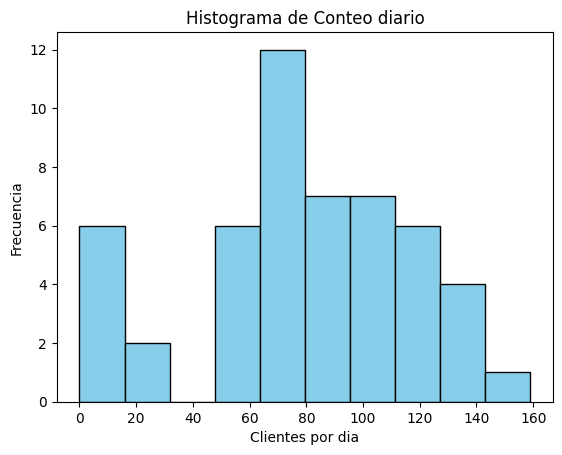

In [25]:
plt.hist(y, bins=10, color='skyblue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Histograma de Conteo diario')
plt.xlabel('Clientes por dia')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

# Separacuion de dato

In [26]:
from sklearn.model_selection import train_test_split
random_state = 13

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

print(f'Entrenamiento: {y_train.shape[0]},\nValidacion: {y_test.shape[0]}')

Entrenamiento: 35,
Validacion: 16


# Modelo Dummy

In [28]:
from librerias_integrador.models.dummy import DummyModel

## Entrenamiento (Dummy)

In [29]:
dummy_model = DummyModel()

dummy_model.fit(X_train, y_train)

In [30]:
from librerias_integrador.models.plots import plot_model_predictions


train:
  rmse: 37.7383,   mae: 28.9780,   mape: 0.8990,   r2: 0.0000

test:
  rmse: 43.5958,   mae: 35.4321,   mape: 0.9040,   r2: -0.0026


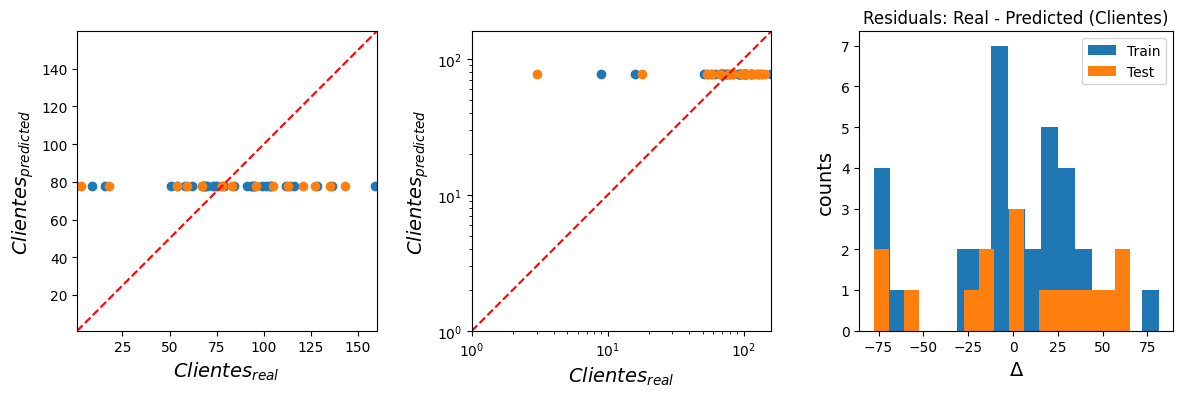

In [31]:
metricas_por_modelo = {}

metricas_por_modelo['dummy'] = plot_model_predictions(dummy_model, X_train, X_test, y_train, y_test, return_metrics=True)

# Modelos alternativos

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

In [33]:
# Diccionario para almacenar las métricas de todos los modelos
model_metrics = {}

# Modelos a evaluar
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Poly': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'DT': DecisionTreeRegressor(min_samples_split=3),
    'MLP': MLPRegressor(random_state=random_state, max_iter=20000)  # Red neuronal simple
}

La selección de modelos en machine learning debe equilibrar la precisión, la complejidad y la interpretabilidad. Por ello escogimos varios modelos alternativos para evaluar:

- Linear Regression: Es el punto de partida para la regresión debido a su simplicidad y eficiencia en el cálculo. Es fácil de interpretar pero asume una relación lineal entre las variables.
- Ridge y Lasso Regression: Son extensiones de la regresión lineal que incluyen regularización para prevenir el sobreajuste. Ridge es útil cuando la mayoría de las características son relevantes, mientras que Lasso puede seleccionar características importantes, descartando las menos significativas.
- Polynomial Regression: Captura relaciones no lineales al introducir términos polinomiales. Aunque puede modelar curvas más complejas, también es susceptible al sobreajuste.
- Decision Tree Regressor (DT): Puede capturar relaciones no lineales y es altamente interpretable. Sin embargo, es propenso al sobreajuste, especialmente si el árbol es muy profundo.
- MLPRegressor (MLP): Es un tipo de red neuronal que puede modelar interacciones complejas entre características. Ofrece una alta capacidad predictiva pero a costa de la interpretabilidad y un mayor costo computacional.

Referencias:
>-James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.
>
>-LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436-444.




 Linear

train:
  rmse: 32.5810,   mae: 25.7497,   mape: 0.8990,   r2: 0.2546

test:
  rmse: 40.8247,   mae: 37.3486,   mape: 0.9040,   r2: 0.1208


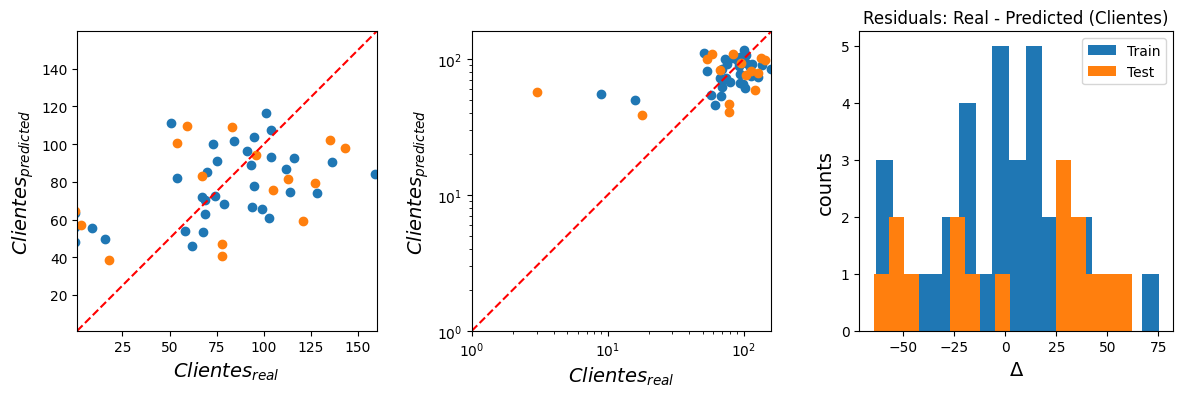




 Ridge

train:
  rmse: 32.6249,   mae: 25.5834,   mape: 0.8990,   r2: 0.2526

test:
  rmse: 40.8778,   mae: 37.2508,   mape: 0.9040,   r2: 0.1185


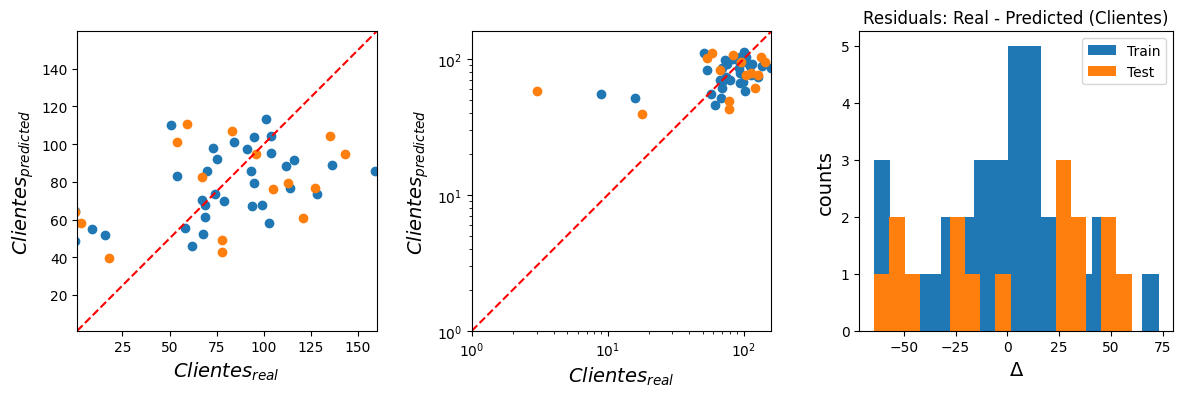




 Lasso

train:
  rmse: 32.8695,   mae: 25.7408,   mape: 0.8990,   r2: 0.2414

test:
  rmse: 41.0237,   mae: 37.0401,   mape: 0.9040,   r2: 0.1122


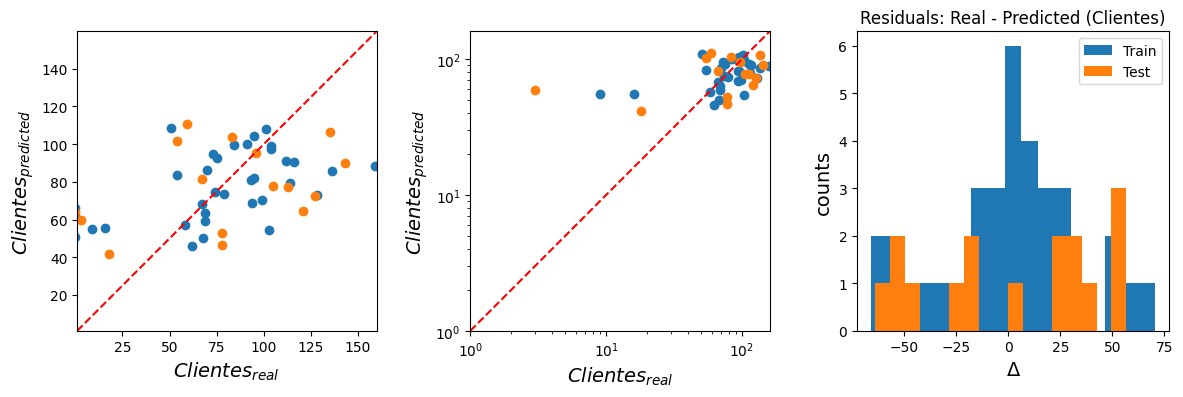




 Poly

train:
  rmse: 25.6704,   mae: 22.0004,   mape: 0.8990,   r2: 0.5373

test:
  rmse: 41.8672,   mae: 33.5170,   mape: 0.9040,   r2: 0.0753


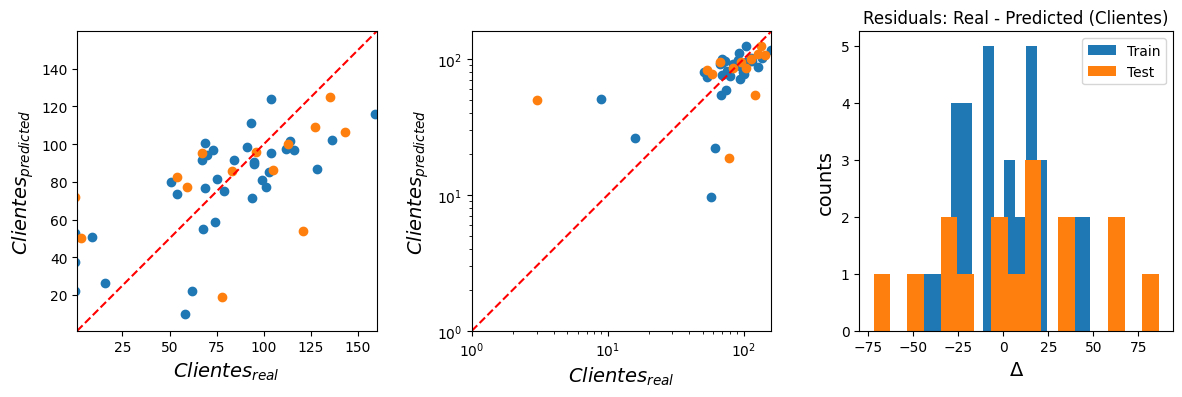




 DT

train:
  rmse: 4.2812,   mae: 2.5429,   mape: 0.8990,   r2: 0.9871

test:
  rmse: 30.1167,   mae: 25.2812,   mape: 0.9040,   r2: 0.5215


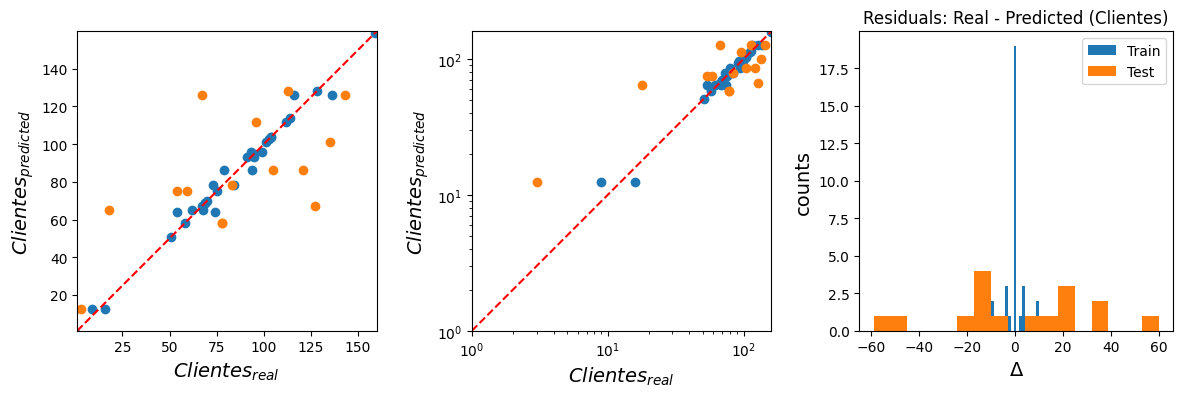




 MLP

train:
  rmse: 33.3706,   mae: 25.6403,   mape: 0.8990,   r2: 0.2181

test:
  rmse: 40.8518,   mae: 36.4995,   mape: 0.9040,   r2: 0.1196


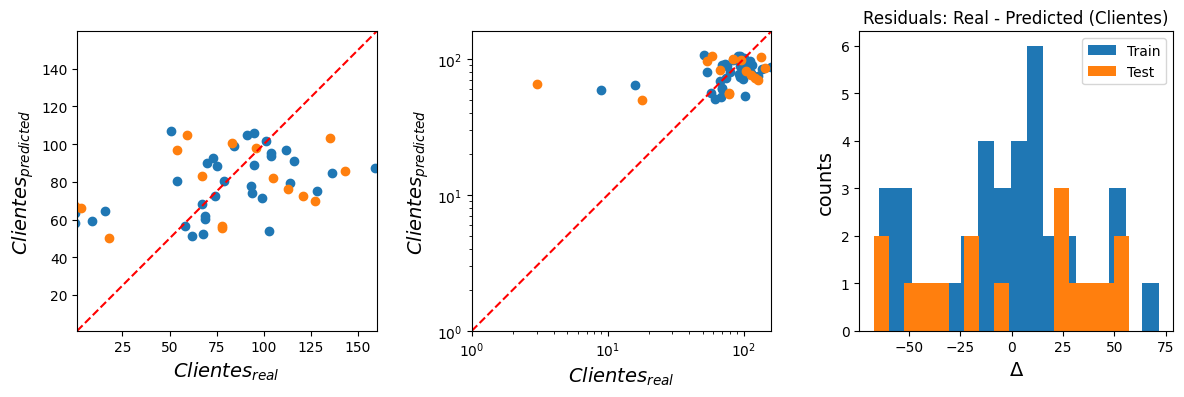

In [34]:
# Entrenamiento y evaluación de modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    print('\n'*3,name)
    metrics = plot_model_predictions(model, X_train, X_test, y_train, y_test, return_metrics=True)
    model_metrics[name] = metrics

In [35]:
model_metrics['dummy'] = metricas_por_modelo['dummy']
# Convertir el diccionario en un DataFrame
metricas_por_modelo_df = pd.DataFrame.from_dict({(i,j): model_metrics[i][j]
                             for i in model_metrics.keys()
                             for j in model_metrics[i].keys()},
                            orient='index')

# Renombrar los índices
metricas_por_modelo_df.index = pd.MultiIndex.from_tuples(metricas_por_modelo_df.index, names=["modelo", "dataset"])
metricas_por_modelo_df

rmse        mae      mape        r2
modelo dataset                                          
Linear train    32.581016  25.749747  0.899049  0.254641
       test     40.824687  37.348570  0.903981  0.120789
Ridge  train    32.624928  25.583416  0.899049  0.252631
       test     40.877832  37.250767  0.903981  0.118498
Lasso  train    32.869549  25.740769  0.899049  0.241381
       test     41.023655  37.040077  0.903981  0.112198
Poly   train    25.670429  22.000417  0.899049  0.537297
       test     41.867173  33.516952  0.903981  0.075313
DT     train     4.281188   2.542857  0.899049  0.987130
       test     30.116700  25.281250  0.903981  0.521522
MLP    train    33.370650  25.640271  0.899049  0.218074
       test     40.851822  36.499490  0.903981  0.119619
dummy  train    37.738261  28.977959  0.899049  0.000000
       test     43.595774  35.432143  0.903981 -0.002620

In [36]:
def plot_metrics(metricas_por_modelo_df, titles):
    """
    Genera un grid de gráficos scatter plot para las métricas de modelos de machine learning.

    Parámetros:
    - metricas_por_modelo_df (DataFrame): Un DataFrame con las métricas de los modelos.
    - titles (list): Una lista de títulos de métricas a graficar.

    Salida:
    - Cuatro gráficos scatter plot en un grid de 2x2.
    """
    # Crear figuras y ejes para un grid de 2x2
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 5))

    # Iterar sobre cada métrica y crear un gráfico para cada una
    for i, metric in enumerate(titles):
        ax = axes[i//2, i%2]
        # Filtrar los datos de entrenamiento y prueba para la métrica actual
        train_data = metricas_por_modelo_df.xs('train', level='dataset')[metric]
        test_data = metricas_por_modelo_df.xs('test', level='dataset')[metric]
        
        # Obtener los nombres de los modelos para el eje x
        x_labels = train_data.index
        
        # Crear scatter plot para los datos de entrenamiento y prueba
        ax.scatter(x_labels, train_data, marker='o', label='Train')
        ax.scatter(x_labels, test_data, marker='x', label='Test')
        
        ax.plot(x_labels, train_data, color='blue', linestyle='-', linewidth=0.5)
        ax.plot(x_labels, test_data, color='orange', linestyle='-', linewidth=0.5)
        
        # Establecer el título y las etiquetas
        ax.set_title(metric)
        ax.set_ylabel(metric)
        
        # Añadir leyenda
        ax.legend()

    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.show()

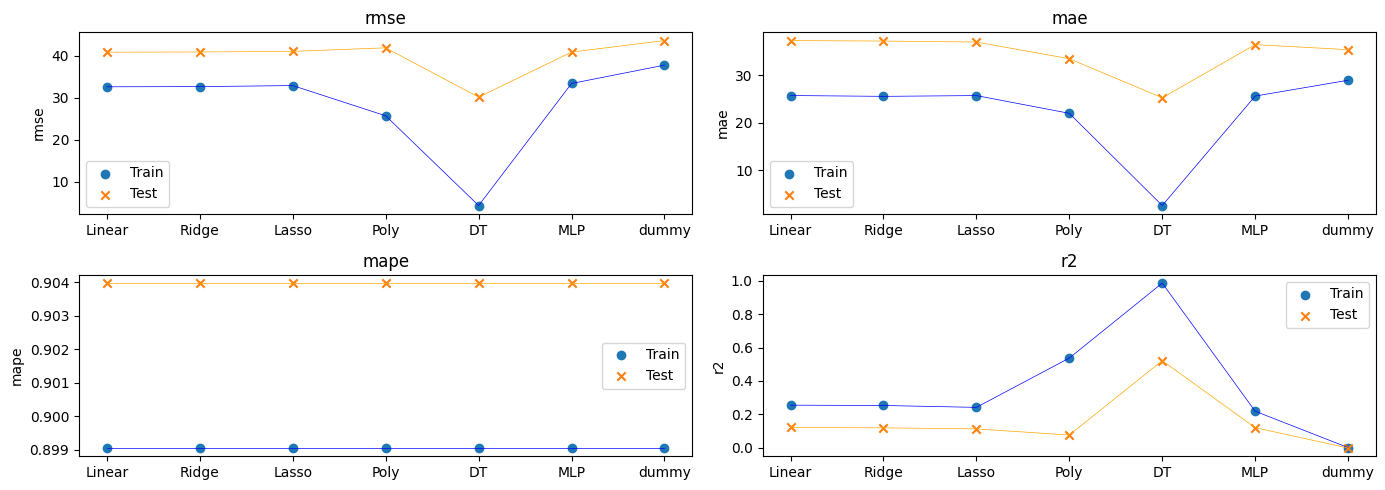

In [37]:
# Títulos de los gráficos
metricas = ['rmse','mae','mape','r2']
plot_metrics(metricas_por_modelo_df, metricas)

# Hiperparametros

In [38]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import make_scorer

from librerias_integrador.models.metrics import neg_root_mean_squared_error
from librerias_integrador.models.plots import plot_cv_results

El uso de RandomizedSearchCV ofrece varias ventajas en la optimización de hiperparámetros para modelos de machine learning:

- Eficiencia: Al seleccionar una muestra aleatoria del espacio de hiperparámetros, reduce significativamente el tiempo computacional en comparación con una búsqueda exhaustiva, especialmente cuando el espacio es grande.
- Exploración: Permite una exploración más diversa del espacio de hiperparámetros, lo que puede llevar al descubrimiento de combinaciones inesperadas que funcionan bien.
- Flexibilidad: Es menos susceptible a quedarse atascado en óptimos locales gracias a su naturaleza aleatoria.
- Escalabilidad: Se adapta bien a espacios de alta dimensión y es efectivo incluso cuando algunos hiperparámetros son más importantes que otros.

In [39]:
cv_n_splits = 3

param_distributions = {
    'Linear':{'fit_intercept':[True, False]},
    'Ridge': {'alpha': np.logspace(-4, 4, 279)},
    'Lasso': {'alpha': np.logspace(-4, 4, 279)},
    'DT': {'max_depth': np.arange(1, 17), 'min_samples_leaf': np.arange(3, 19)},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'activation': ['tanh', 'relu'], 'alpha':np.logspace(-4, 0.1, 279).tolist()},
    'Poly': {'polynomialfeatures__degree': np.arange(1, 5), 'linearregression__fit_intercept': [True, False]}
}

cv = KFold(n_splits=cv_n_splits, shuffle=True, random_state=random_state)

In [40]:
total_combinations = {model: np.prod([len(values) for values in params.values()]) for model, params in param_distributions.items()}
print(f"Total de combinaciones de parámetros por modelo: {total_combinations}")

Total de combinaciones de parámetros por modelo: {'Linear': 2, 'Ridge': 279, 'Lasso': 279, 'DT': 256, 'MLP': 2232, 'Poly': 8}


In [41]:
rmse_scorer = make_scorer(neg_root_mean_squared_error, greater_is_better=True)




 Linear
Train Median per CV: [(0, -33.1194), (1, -35.1346), (2, -36.7788)]
Test Median per CV: [(0, -39.3696), (1, -36.1724), (2, -33.4239)]


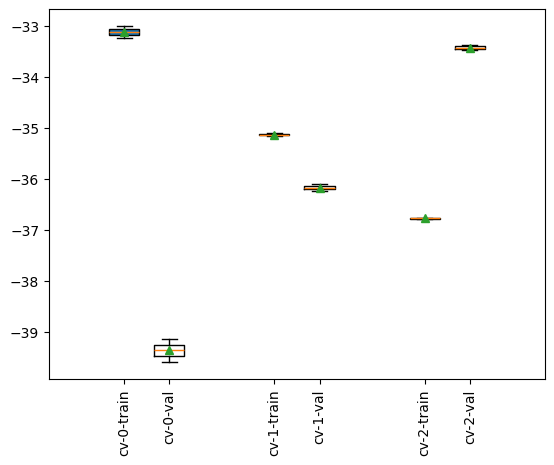

Mejores parámetros para Linear: {'fit_intercept': False}







 Ridge
Train Median per CV: [(0, -33.2061), (1, -35.1606), (2, -37.2749)]
Test Median per CV: [(0, -39.7329), (1, -36.4601), (2, -32.1877)]


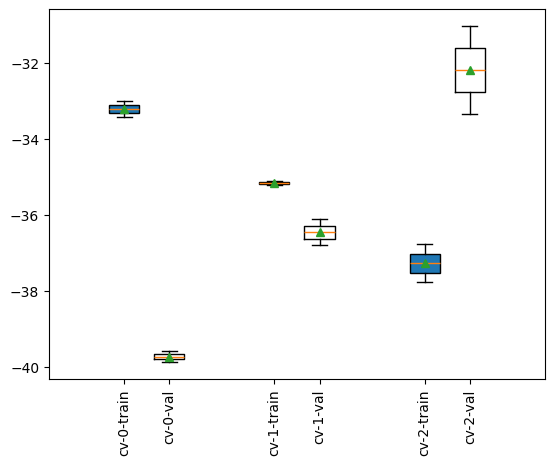

Mejores parámetros para Ridge: {'alpha': 11.60775415495393}







 Lasso
Train Median per CV: [(0, -33.4082), (1, -35.3089), (2, -37.4736)]
Test Median per CV: [(0, -39.6581), (1, -36.388), (2, -32.1496)]


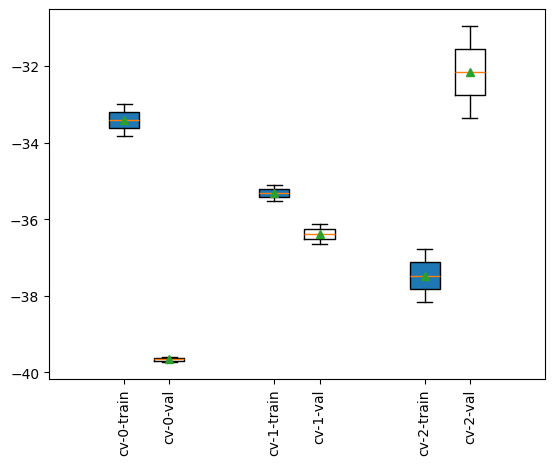

Mejores parámetros para Lasso: {'alpha': 11.60775415495393}







 Poly
Train Median per CV: [(0, -25.6503), (1, -26.6499), (2, -28.1043)]
Test Median per CV: [(0, -42.7316), (1, -36.649), (2, -33.9886)]


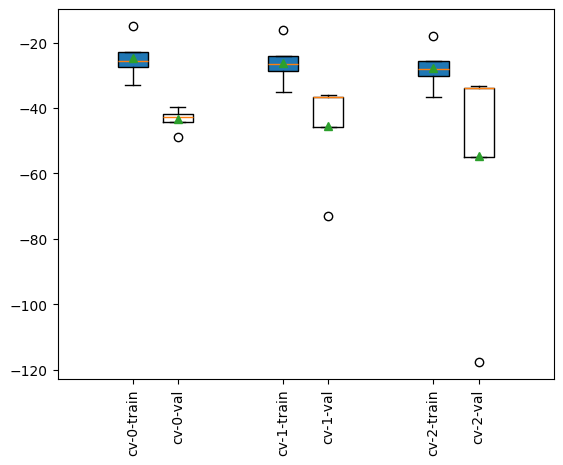

Mejores parámetros para Poly: {'polynomialfeatures__degree': 1, 'linearregression__fit_intercept': False}







 DT
Train Median per CV: [(0, -29.4107), (1, -31.3487), (2, -32.404)]
Test Median per CV: [(0, -37.3459), (1, -34.8697), (2, -29.6284)]


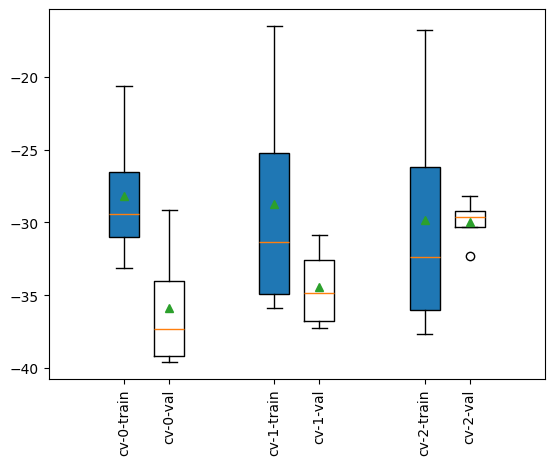

Mejores parámetros para DT: {'min_samples_leaf': 11, 'max_depth': 16}







 MLP


C:\Users\fcopa\anaconda3\envs\integrador\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Median per CV: [(0, -23.1984), (1, -14.678), (2, -21.0546)]
Test Median per CV: [(0, -45.9423), (1, -40.9003), (2, -41.4742)]


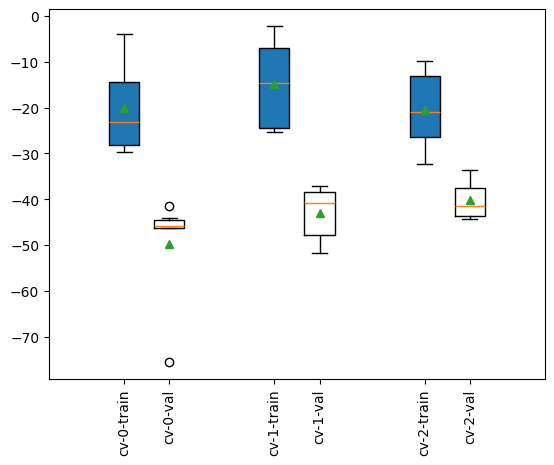

Mejores parámetros para MLP: {'hidden_layer_sizes': (50,), 'alpha': 1.2168913346772734, 'activation': 'relu'}






In [42]:
min_iter = 107
best_regressors = {}

# Realizar RandomizedSearchCV para cada modelo
for model_name, model in models.items():
    print('\n'*3,model_name)
    parameters = param_distributions[model_name]
    n_iter = min(min_iter, sum(len(values) for values in parameters.items()))
    search = RandomizedSearchCV(model, 
                                parameters, 
                                n_iter=n_iter, cv=cv, 
                                random_state=random_state,
                               return_train_score=True,
                               scoring=rmse_scorer)
    search.fit(X, y)
    
    # Almacenar el mejor regresor en el diccionario
    best_regressors[model_name] = search.best_estimator_
    
    # Usar la función plot_cv_results para visualizar los resultados
    plot_cv_results(search.cv_results_, cv)
    
    # Imprimir los mejores parámetros encontrados
    print(f'Mejores parámetros para {model_name}: {search.best_params_}')
    print('\n'*3)




 Linear

train:
  rmse: 32.8989,   mae: 24.8977,   mape: 0.8990,   r2: 0.2400

test:
  rmse: 40.0646,   mae: 36.4743,   mape: 0.9040,   r2: 0.1532


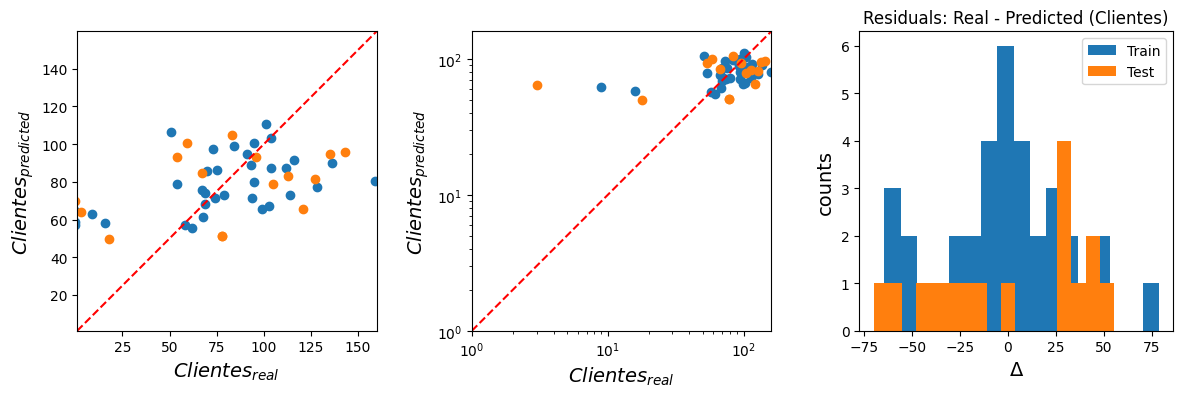




 Ridge

train:
  rmse: 32.9797,   mae: 25.3345,   mape: 0.8990,   r2: 0.2363

test:
  rmse: 40.6695,   mae: 36.5980,   mape: 0.9040,   r2: 0.1275


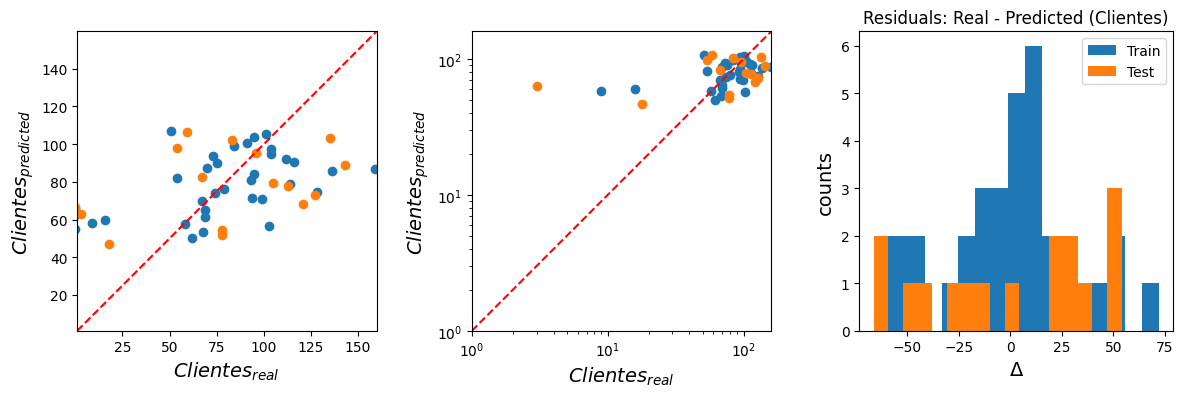




 Lasso

train:
  rmse: 33.4052,   mae: 25.6091,   mape: 0.8990,   r2: 0.2165

test:
  rmse: 40.8102,   mae: 36.3529,   mape: 0.9040,   r2: 0.1214


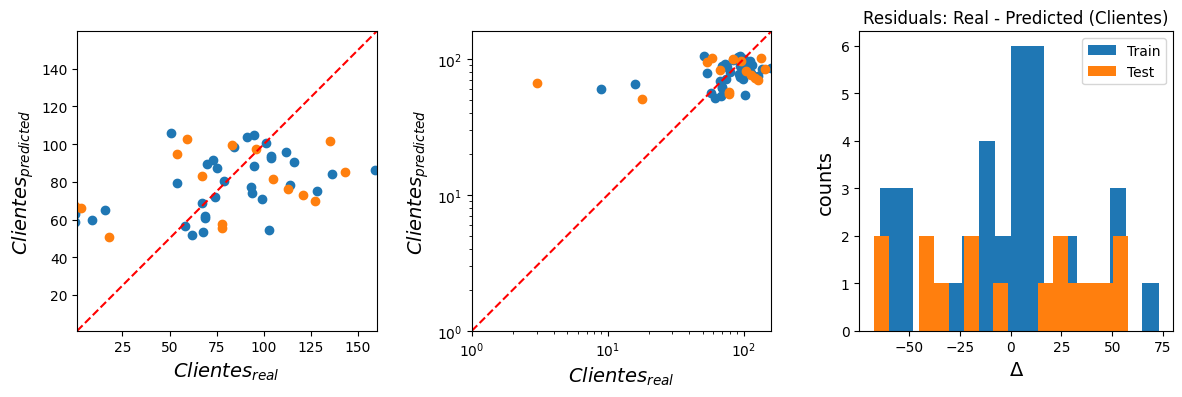




 Poly

train:
  rmse: 32.7010,   mae: 25.3685,   mape: 0.8990,   r2: 0.2491

test:
  rmse: 40.2258,   mae: 36.8159,   mape: 0.9040,   r2: 0.1464


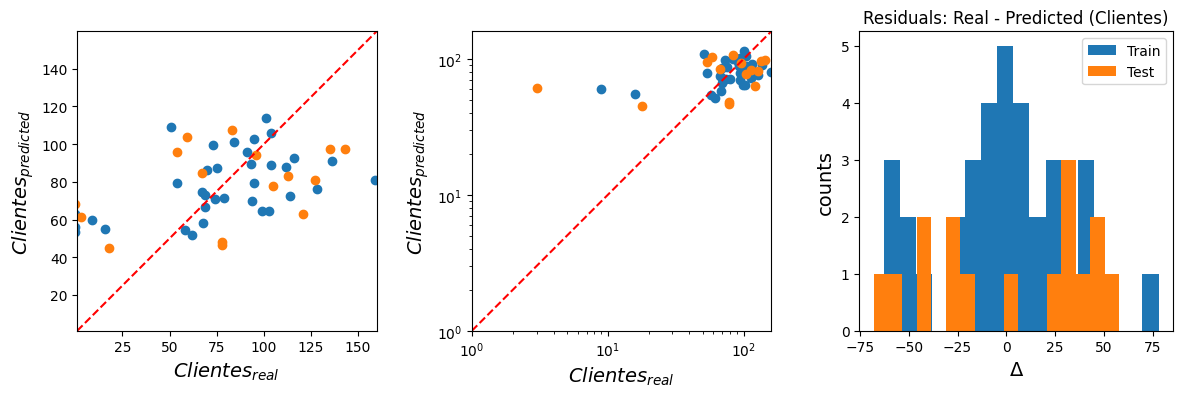




 DT

train:
  rmse: 28.0662,   mae: 24.1371,   mape: 0.8990,   r2: 0.4469

test:
  rmse: 29.8663,   mae: 26.1617,   mape: 0.9040,   r2: 0.5294


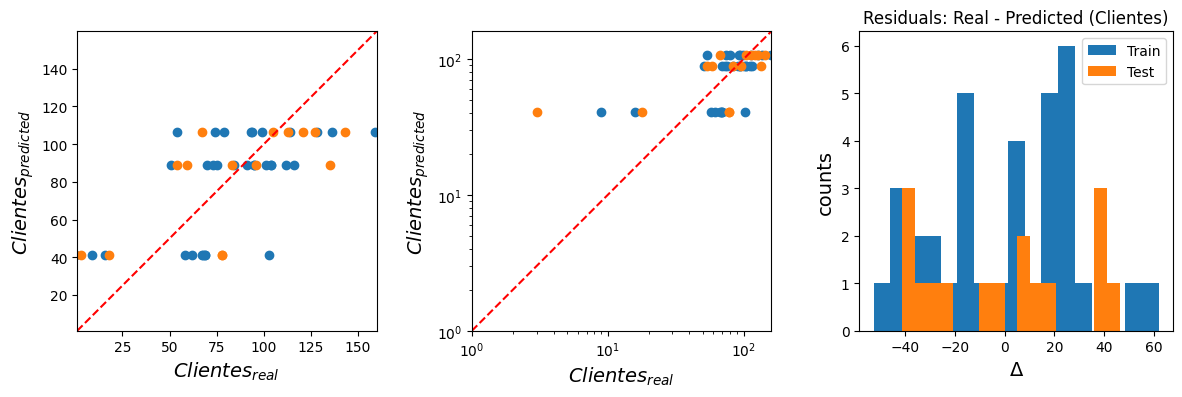




 MLP

train:
  rmse: 29.0557,   mae: 23.1887,   mape: 0.8990,   r2: 0.4072

test:
  rmse: 27.6524,   mae: 22.5485,   mape: 0.9040,   r2: 0.5966


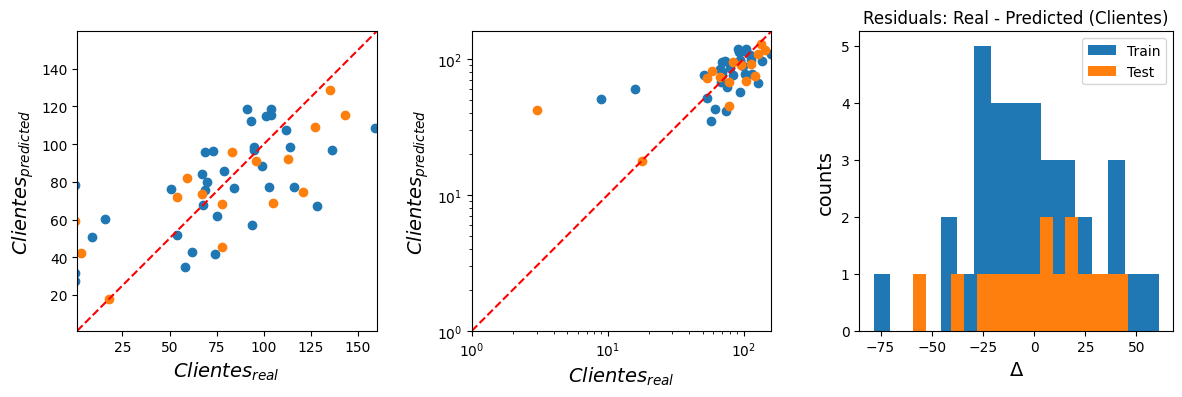

In [43]:
model_metrics_tuned = {}
# Después del bucle for, puedes acceder a los mejores modelos así:
for model_name, best_model in best_regressors.items():
    print('\n'*3,model_name)
    # Usar la función plot_model_predictions para visualizar las predicciones del mejor modelo
    model_metrics_tuned[model_name] = plot_model_predictions(best_model, X_train, X_test, y_train, y_test, return_metrics=True)

In [44]:
model_metrics_tuned['dummy'] = metricas_por_modelo['dummy']

# Convertir el diccionario en un DataFrame
metricas_por_modelo_tuned_df = pd.DataFrame.from_dict({(i,j): model_metrics_tuned[i][j]
                             for i in model_metrics_tuned.keys()
                             for j in model_metrics_tuned[i].keys()},
                            orient='index')

# Renombrar los índices
metricas_por_modelo_tuned_df.index = pd.MultiIndex.from_tuples(metricas_por_modelo_tuned_df.index, names=["modelo", "dataset"])
metricas_por_modelo_tuned_df

rmse        mae      mape        r2
modelo dataset                                          
Linear train    32.898899  24.897726  0.899049  0.240026
       test     40.064556  36.474338  0.903981  0.153225
Ridge  train    32.979673  25.334488  0.899049  0.236289
       test     40.669469  36.598039  0.903981  0.127462
Lasso  train    33.405222  25.609083  0.899049  0.216453
       test     40.810184  36.352884  0.903981  0.121413
Poly   train    32.700980  25.368538  0.899049  0.249142
       test     40.225845  36.815857  0.903981  0.146393
DT     train    28.066197  24.137115  0.899049  0.446900
       test     29.866267  26.161663  0.903981  0.529446
MLP    train    29.055654  23.188662  0.899049  0.407215
       test     27.652398  22.548530  0.903981  0.596621
dummy  train    37.738261  28.977959  0.899049  0.000000
       test     43.595774  35.432143  0.903981 -0.002620

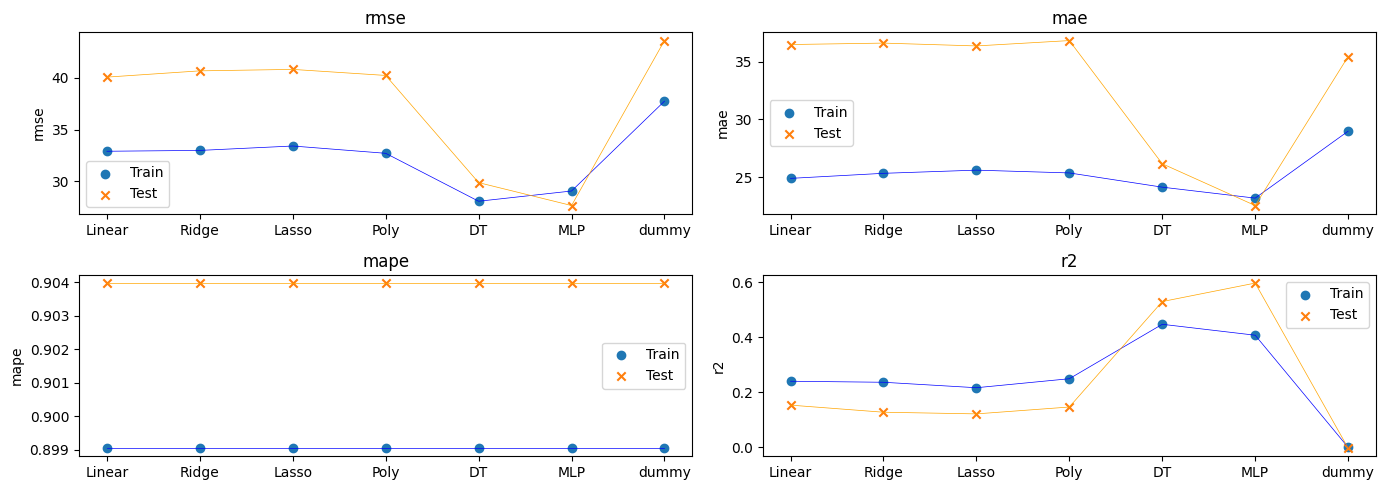

In [46]:
plot_metrics(metricas_por_modelo_tuned_df, metricas)

# Analisis de resultados

Al analizar el rendimiento de los modelos de regresión, observamos que tanto el DecisionTreeRegressor (DT) como el MLPRegressor (MLP) superan a los demás modelos en términos de las métricas de rendimiento clave: RMSE, MAE, MAPE, y R^2.

El DT muestra una mejora significativa en las métricas de entrenamiento en comparación con las de prueba, lo que sugiere un posible sobreentrenamiento. Este fenómeno se caracteriza por un modelo que aprende los datos de entrenamiento tan bien que pierde generalización, resultando en un rendimiento inferior en datos no vistos. Adicionado al comportamiento de bloques observado en el gráfico de correlación de el conteo real vs el predicho, identificándose 3 escalones y no un comportamiento lineal.

Por otro lado, el MLP muestra un equilibrio más consistente entre las métricas de entrenamiento y prueba, lo que indica una mejor generalización a nuevos datos. Aunque el DT tiene un R^2 ligeramente superior en la prueba, la consistencia del MLP en ambas fases sugiere que es más confiable para hacer predicciones en situaciones del mundo real.

Además, el MLP muestra que existe un potencial para aplicar aprendizaje profundo, que es una rama avanzada de machine learning capaz de modelar interacciones complejas y aprender representaciones de alto nivel de los datos. Esto lo hace particularmente valioso para tareas donde las relaciones entre las características no son lineales o bien definidas.

En términos de trade-offs, aunque el MLP puede ser más difícil de interpretar que el DT, la importancia de la interpretabilidad debe sopesarse contra la precisión y la generalización. En muchas aplicaciones industriales y comerciales, la capacidad de generalizar y predecir con precisión puede ser más valiosa que la explicabilidad del modelo.

En resumen, el MLPRegressor parece ser el modelo más robusto y confiable para este conjunto de datos, equilibrando el rendimiento en los datos de entrenamiento y prueba y ofreciendo ventajas en el contexto del aprendizaje profundo. Aunque el DT puede ser más fácil de explicar, el sobreentrenamiento y la menor generalización sugieren que el MLP es una mejor elección para aplicaciones prácticas donde la precisión y la capacidad de generalización son primordiales.